<a href="https://colab.research.google.com/github/GzpTez0514/-sklearn/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

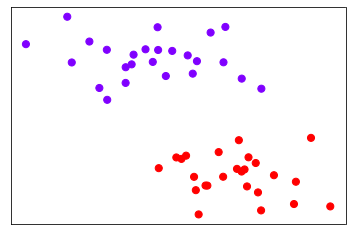

In [3]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 实例化数据集
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

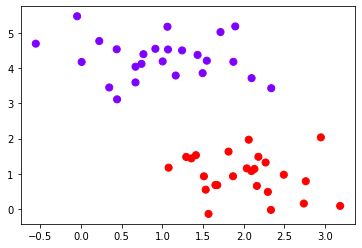

In [2]:
# 画决策边界，contour:绘制等高线函数
# 首先要有散点图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前的子图，如果不存在，则创建新的子图

In [3]:
# 画决策边界：制作网格，用meshgrid
# 获取平上面两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
print(xlim)
ylim = ax.get_ylim()
print(ylim)

(-0.7425578984849813, 3.3721920271976598)
(-0.41872382476349596, 5.754870487889891)


In [4]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
print(axisx.shape)
print(axisy.shape)

(30,)
(30,)


In [5]:
# 使用meshgrid函数将两个一维向量转换为特征矩阵，核心是将两个特征向量进行广播
axisx, axisy = np.meshgrid(axisx, axisy)
print(axisx.shape)
print(axisy.shape)

(30, 30)
(30, 30)


In [6]:
# ravel()是降维函数，vstack能够将多个结构一致的多维数组上下合并
# xy就是已经形成的网格，它是遍布在整个画布上的密集的点
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
print(xy)

[[-0.7425579  -0.41872382]
 [-0.60066997 -0.41872382]
 [-0.45878204 -0.41872382]
 ...
 [ 3.08841617  5.75487049]
 [ 3.2303041   5.75487049]
 [ 3.37219203  5.75487049]]


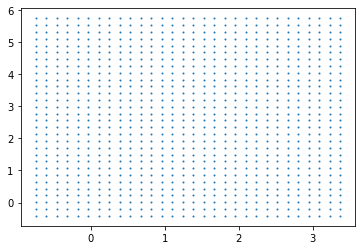

In [7]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap='rainbow')

In [8]:
# 举例（meshgrid、ravel和vstack）
a = np.array([1, 2, 3])
b = np.array([7, 8])
v1, v2 = np.meshgrid(a, b)
print(v1)
print(v2)
print(v1.ravel())
print(v2.ravel())
v = np.vstack([v1.ravel(), v2.ravel()]).T

[[1 2 3]
 [1 2 3]]
[[7 7 7]
 [8 8 8]]
[1 2 3 1 2 3]
[7 7 7 8 8 8]


(-0.41872382476349596, 5.754870487889891)

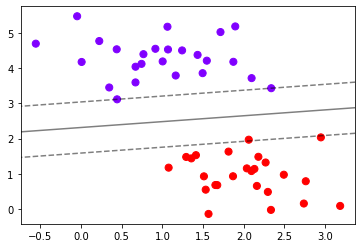

In [9]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel='linear').fit(X,y)
# 接口decidion_function(), 返回每个输入样本所对应的到决策边界的距离
# 然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求z的结构必须与meshgrid()创建后返回的结构一致
Z = clf.decision_function(xy).reshape(axisx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()

# 画出决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, Z,
     colors='k',
     levels=[-1, 0, 1],   # 画三条等高线，分别为-1， 0， 1
     alpha=0.5,
     linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [13]:
# 探索建好的模型

# 根据决策边界，对X中的样本进行分类，返回的结构为n_samples
print(clf.predict(X))

# 返回给定测试数据和标签的平均准确度
print(clf.score(X, y))

# 返回支持向量
print(clf.support_vectors_)

# 返回每个类中支持向量的个数
print(clf.n_support_)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]
1.0
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
[2 1]


(100, 2)
(100,)


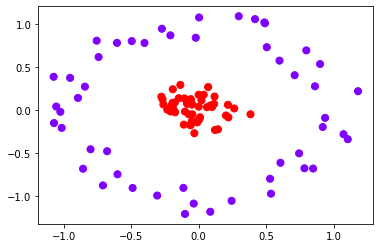

In [17]:
# 推广到非线性情况
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

(100, 2)
(100,)


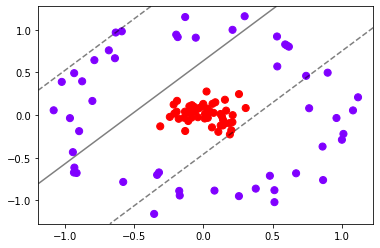

In [28]:
# 将绘制等高线的过程包装成函数
def plot_svc_decision_function(model, ax=None):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  x, y = np.meshgrid(x, y)
  xy = np.vstack([x.ravel(), y.ravel()]).T
  Z = model.decision_function(xy).reshape(x.shape)
  ax.contour(x, y, Z, 
        colors='k',
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=['--', '-', '--'])
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
X, y = make_circles(100, factor=0.1, noise=0.1)
print(X.shape)
print(y.shape)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)


interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

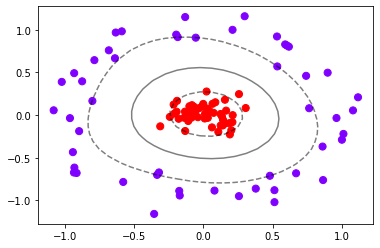

In [36]:
# 现在线性SVM已经不适合于我们的状况了,来看看添加维度让我们的数据如何变化
# 为非线性数据增加维度并绘制3D图像

# 定义一个由x计算出来的新维度r
r = np.exp(-(X ** 2).sum(1))
rlim = np.linspace(min(r), max(r), 100)

from mpl_toolkits import mplot3d
# 定义一个绘制三维图像的函数
# elev表示上下旋转的角度
# azim表示平行旋转的角度
def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')
  plt.show()

from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

clf = SVC(kernel='rbf').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

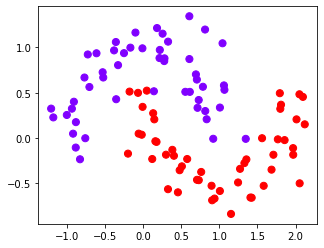

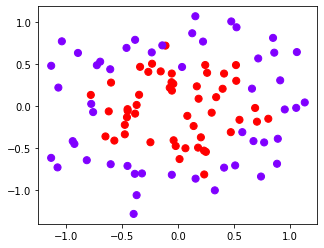

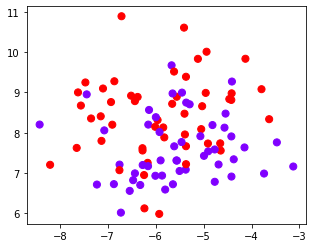

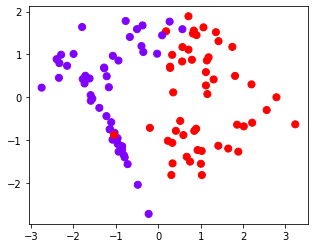

In [4]:
# 探索核函数在不同数据集上的表现
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

# 创建数据集，定义核函数的选择
n_samples = 100
datasets = [
  make_moons(n_samples=n_samples, noise=0.2, random_state=0),
  make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
  make_blobs(n_samples=n_samples, centers=2, random_state=5),
  make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)]

Kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for X, y in datasets:
  plt.figure(figsize=(5, 4))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

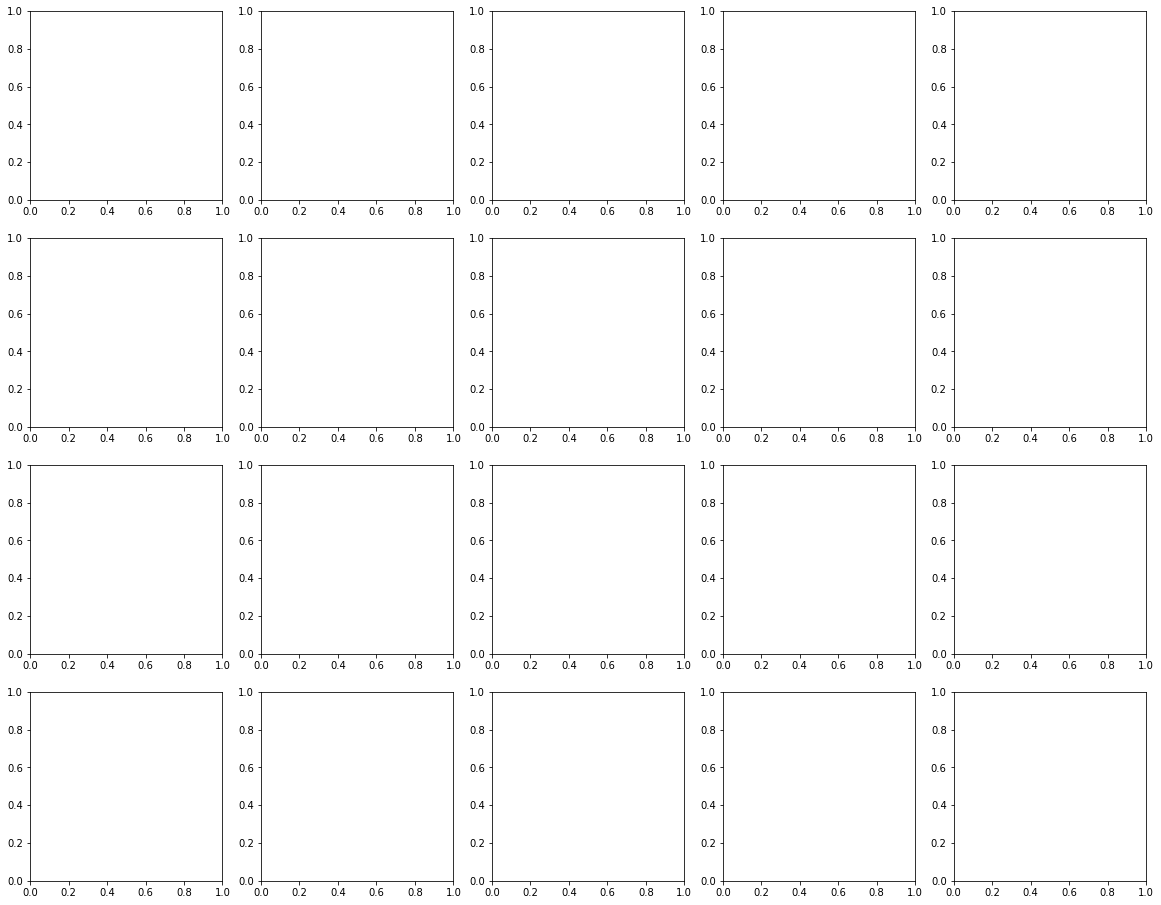

In [5]:
# 构建子图
nrows = len(datasets)
ncols = len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))

In [6]:
# 开始进行子图循环
# 第一层循环：在不同的数据集中循环
for ds_cnt, (X, y) in enumerate(datasets):
  # 在图像中的第一列，放置原数据的分布
  ax = axes[ds_cnt, 0]
  if ds_cnt == 0:
    ax.set_title('Input data')
  ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
  ax.set_xticks([])
  ax.set_yticks([])

  # 第二层循环:在不同的核函数中循环
  # 从图像第二列开始，一个个填充分类结果

  for est_idx, kernel in enumerate(Kernel):
    # 定义子图的位置
    ax = axes[ds_cnt, est_idx + 1]

    # 建模
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
    score = clf.score(X, y)
    
    # 绘制图像本身的散点图
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
  
    # 绘制支持向量
    ax.scatter(clf.support_vectors_[:, 0], 
          clf.support_vectors_[:, 1],
          s=50, facecolors='none', zorder=10, edgecolors='k')
    
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # 如果步长为复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值包含在内
    axisx, axisy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    # np.c_,类似于np.vstack的功能
    Z = clf.decision_function(np.c_[axisx.ravel(), axisy.ravel()]).reshape(axisx.shape)

    # 填充等高线不同区域的颜色
    ax.pcolormesh(axisx, axisy, Z > 0, cmap=plt.cm.Paired)

    # 绘制等高线
    ax.contour(axisx, axisy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-1, 0, 1])


    # 设定坐标轴为不显示
    ax.set_xticks([])
    ax.set_yticks([])

    # 将标题放在第一行的顶上
    if ds_cnt == 0:
      ax.set_title(kernel)
    
    # 为每张图添加分类的分数
    ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'), 
          size=15,
          bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),  # 为分数添加一个白色的格子作为底色
          transform=ax.transAxes,  # 确定文字对应的坐标轴，就是ax子图的坐标轴本身
          horizontalalignment='right' # 位于坐标轴的什么方向
          )
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: No contour levels were found within the data range.


<Figure size 432x288 with 0 Axes>